In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy import signal
from scipy.io.wavfile import write as write
import librosa
import librosa.display

sr = 44100

class TwoTone:
    
    def __init__(self, f1=60, f2=7000, a2=0.25, peak=0.5):
        self.f1 = f1
        self.f2 = f2
        self.a2 = a2
        self.peak = peak
        
    def display(self):
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(self.y, sr=sr)
        
        w = signal.windows.blackmanharris(len(self.y))
        yw = self.y*w
        yf = rfft(yw)
        pwr = yf*yf.conjugate()
        db = librosa.power_to_db(pwr, top_db=120)
        db -= db.max()
        plt.figure(figsize=(14, 6))
        plt.stem(db, bottom=-120)
        
        idx = np.nonzero(db > -95.0)
        print(idx)
        print(db[idx])

    def gen(self, seconds):
        length = int(sr * seconds)
        y = librosa.tone(self.f1, sr=sr, length=length)
        y2 = librosa.tone(self.f2, sr=sr, length=length) * self.a2
        y += y2
        y *= (self.peak / max(y))
        self.y = y
        return self.y
    
    def write(self, fname='two_tone.wav'):
        a = np.iinfo(np.int16).max
        y = a * self.y
        write(fname, sr, y.astype(np.int16)) # %y.astype(np.float32))  # 
        

(array([  1794,   1796,   1798,   1800,   1802,   1804,   1806, 209994,
       209996, 209998, 210000, 210002, 210004, 210006], dtype=int64),)
[-35.76744467 -14.11477834  -3.34287124   0.          -3.34287124
 -14.11477834 -35.76744467 -47.8086445  -26.15597817 -15.38407106
 -12.04119983 -15.38407106 -26.15597817 -47.8086445 ]


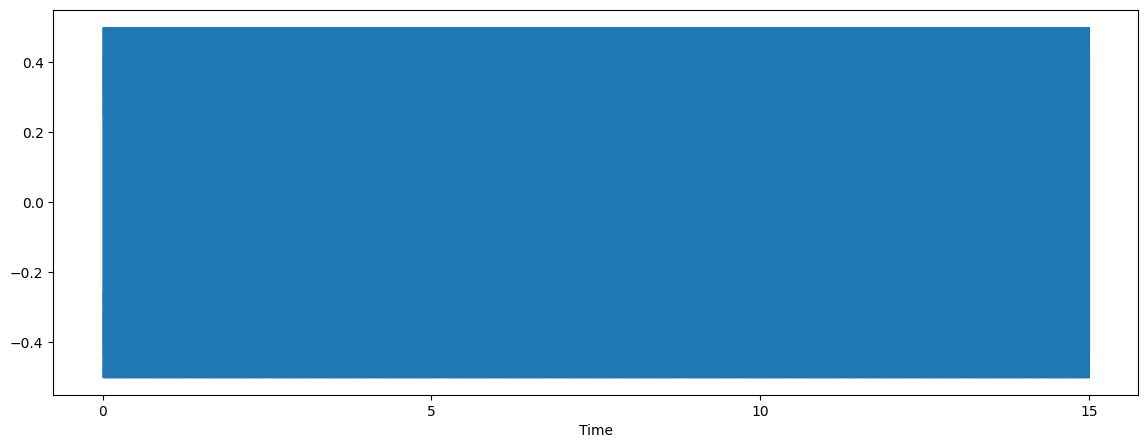

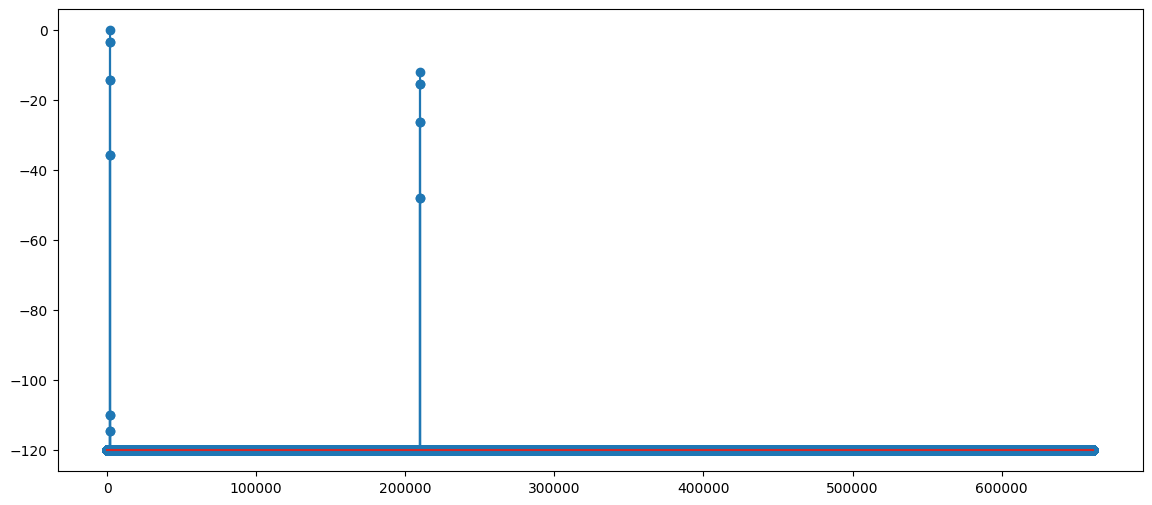

In [4]:
tt = TwoTone(60, 7000, 0.25)

tt.gen(15)
tt.display()
tt.write('tt_60_7k.wav')

(array([569994, 569996, 569998, 570000, 570002, 570004, 570006, 599994,
       599996, 599998, 600000, 600002, 600004, 600006], dtype=int64),)
[-3.57674447e+01 -1.41147783e+01 -3.34287124e+00 -3.41060513e-13
 -3.34287124e+00 -1.41147783e+01 -3.57674447e+01 -3.57674447e+01
 -1.41147783e+01 -3.34287124e+00  0.00000000e+00 -3.34287123e+00
 -1.41147783e+01 -3.57674447e+01]


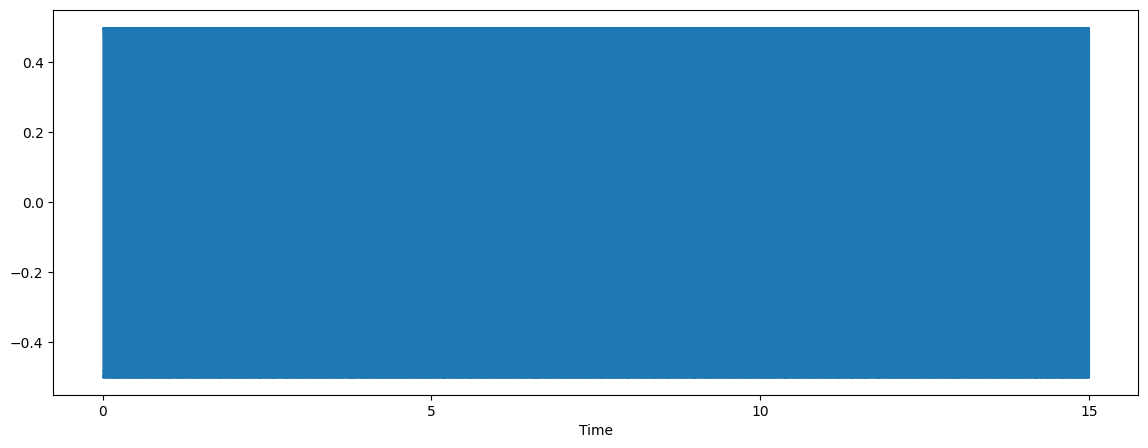

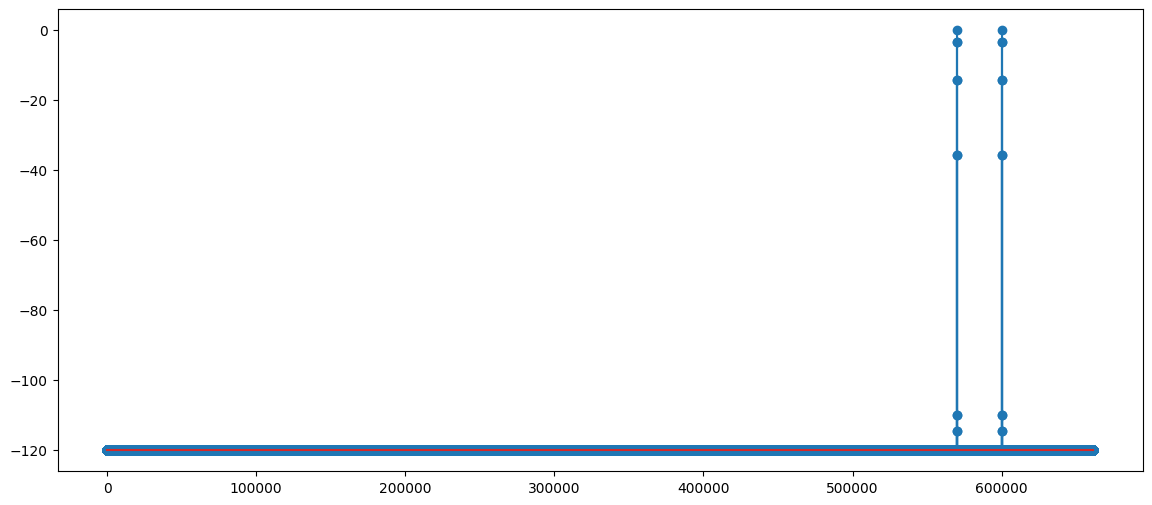

In [5]:
tt = TwoTone(19000, 20000, 1.0)

tt.gen(15)
tt.display()
tt.write('tt_19k_20k.wav')